In [124]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
sns.set(style='darkgrid')

In [125]:
url = 'https://www.multpl.com/united-states-population/table/by-year'

In [128]:
result = requests.get(url)

c = result.content

soup = BeautifulSoup(c)

In [134]:
summary = soup.find("div",{'class':'tcol'})

tables = summary.find_all('table')


In [135]:
rows = tables[0].findAll('tr')

In [136]:
Raw_Data = []

for tr in rows:
    
    cell = tr.findAll('td')
    
    for td in cell:
        
        text = td.find(text = True)
        
        Raw_Data.append(text)
        
        
        
        

In [149]:
count = 1
Year = []
Population = []
for data in Raw_Data:
    
    if count % 2 != 0:
        
        Year.append(data)
        
    if count % 2 == 0:
        
        Population.append(data.replace(" million\n\n",""))
        
    count += 1
        


In [151]:
Population =[float(i) for i in Population]

In [153]:
PSer = Series(Population)
YSer = Series(Year)

In [156]:
DataTable = pd.concat([YSer,PSer],axis = 1)

In [158]:
DataTable.columns = ['Year','Population']

In [160]:
DataTable.head()

,Year,Population
0,"Mar 1, 2020",329.34
1,"Jul 1, 2019",328.24
2,"Jul 1, 2018",326.69
3,"Jul 1, 2017",324.99
4,"Jul 1, 2016",322.94


Text(0.5, 1.0, 'US Population by Year')

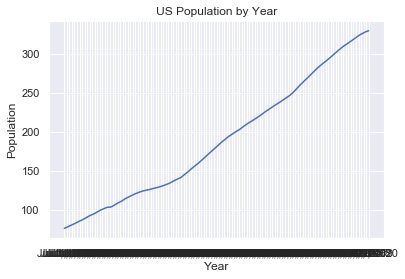

In [163]:
g = sns.lineplot(DataTable.iloc[:,0],DataTable.iloc[:,1])
g.set_title('US Population by Year');